## Dependencies

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


## Importing and purging the DataFrame

In [3]:
wines_df=pd.read_csv('WineQT.csv')
wines_df.drop('Id', axis='columns', inplace=True)
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Setting features columns and target columns
In this case, features columns will be the wine features, our goal is to determine the quality of it by them

In [4]:
wines_np=wines_df.to_numpy()

X=wines_np[:,:-1]
y=wines_np[:,-1]

# Checking X data
Should start with fixed acidity value and ends with alcohol value

In [5]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

# Checking y data
Should only have one target data that would be the quality

In [6]:
y

array([5., 5., 5., ..., 5., 6., 5.])

# Split train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Creating the Decision Tree model and fitting the Data

In [8]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=50, random_state=50)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Checking our Model Accuracy

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.611353711790393


### Checking model differences... 
As you can see below, even though the accuracy of the model it is only 65%, the difference between predicted target and real target is between -2 and 2, this means that the model works pretty decently

In [10]:
y_pred-y_test

array([ 1.,  0.,  0.,  1.,  0., -1.,  1.,  0., -1.,  0.,  0.,  0., -1.,
        1.,  1.,  0., -1.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,
        0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1., -1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0., -1.,  0., -1.,  1.,  0., -1., -1., -1., -1.,
        0., -2.,  0., -1.,  1.,  0.,  1., -1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0., -2.,  1.,  0.,  0.,  0.,  0.,  0., -1., -2.,  0.,
        0.,  0., -2.,  1.,  0., -3.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0., -1.,  1.,  0.,  0., -1.,  1.,  2.,  1., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0., -1.,  0.,  0.,  1., -1., -1., -1.,  0., -1., -1.,  0

# Graphing the decision Tree

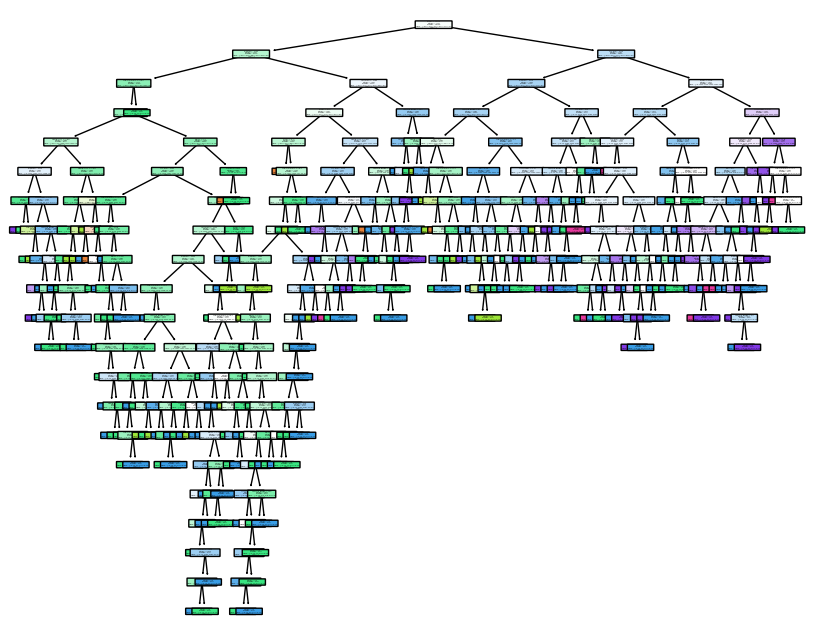

In [11]:
features_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',	'sulphates', 'alcohol']
target=['1','2','3','4','5','6','7','8','9','10']

plt.figure(figsize=(10, 8))
plot_tree(clf,
          feature_names=features_cols,
          class_names=target,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples



# Graphing predicted values vs True values

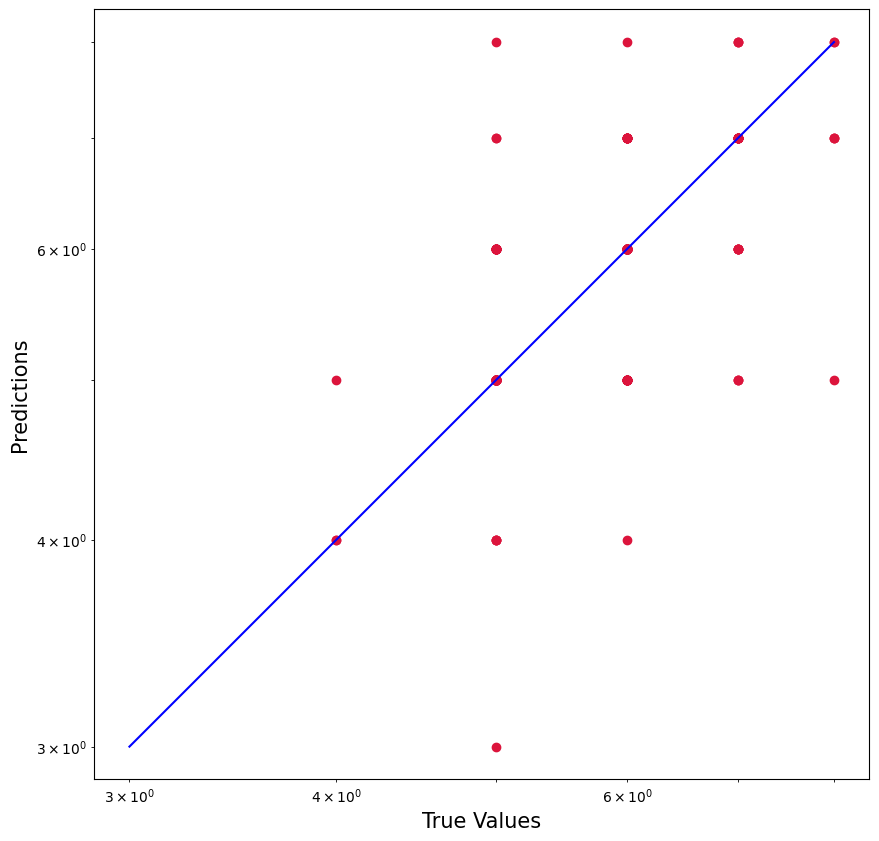

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Graphing Differences between test and predicted

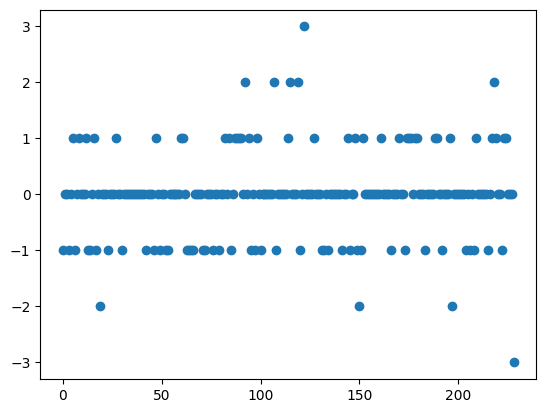

In [15]:
plt.plot(y_test - y_pred,marker='o',linestyle='')

# Conclusion
#### Even though the model has an accuracy of 61% (Which it's pretty decent), the differences almost in most cases are between -2 to 2 and in very rare cases from 3 which make this a great model to make wine predictions!